<a href="https://colab.research.google.com/github/rakshaa2000/30-Days-of-ML/blob/main/Titanic/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic: Machine Learning from Disaster**

This notebook predicts survival in the disaster.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [4]:
# Get a glimpse of data
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'People Number')

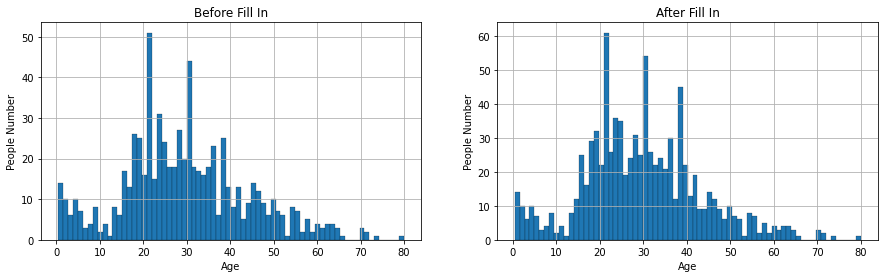

In [5]:
#Af first fill lost data, fill age data 

# Get avarage, std to calculate the limitaton of random number
# Get NAN number to determine how many data need to generate
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

# Plot original age data
titanic_df['Age'].dropna().hist(bins=70, ax=axis1, ls='solid', lw=0.2, ec='black')

average_age = titanic_df.Age.mean()
std_age = titanic_df.Age.std()
nan_age_number = titanic_df.Age.isnull().sum()

# Generate 
rand_age = np.random.randint(average_age - std_age, average_age + std_age, 
                             size = nan_age_number)
# Fill in 
titanic_df.loc[np.isnan(titanic_df['Age']), 'Age'] = rand_age

# Plot result
titanic_df['Age'].hist(bins=70, ax=axis2, ls='solid', lw=0.2, ec='black')
axis1.set_title('Before Fill In')
axis1.set_xlabel('Age')
axis1.set_ylabel('People Number')
axis2.set_title('After Fill In')
axis2.set_xlabel('Age')
axis2.set_ylabel('People Number')

In [6]:
# At first drop data it seems useless for this analysis
# they are ID, name, ticket number, embark place, cabin, SibSp, and Parch
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket','Embarked','Cabin','SibSp','Parch'],axis = 1)
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
# At first let's analyse from sex and age view
# Divide children from male and female type
titanic_df.loc[titanic_df['Age'] <= 16, 'Sex'] = 'child'
titanic_df = titanic_df.drop(['Age'],axis=1)
titanic_df.head()

,Survived,Pclass,Sex,Fare
0,0,3,male,7.2500
1,1,1,female,71.2833
2,1,3,female,7.9250
3,1,1,female,53.1000
4,0,3,male,8.0500


In [8]:
# Give more descriptive labels for Survived and Pclass
titanic_df['Survival'] = titanic_df.Survived.map({0:'Died',1:'Survived'})
titanic_df['Class'] = titanic_df.Pclass.map({1:'1st Class',2:'2nd Class',3:'3rd Class'})

# Child and not child
titanic_df['Child'] = titanic_df.Sex.map({'child':'Is Child','female':'Not Child','male':'Not Child'})
titanic_df.head()

,Survived,Pclass,Sex,Fare,Survival,Class,Child
0,0,3,male,7.2500,Died,3rd Class,Not Child
1,1,1,female,71.2833,Survived,1st Class,Not Child
2,1,3,female,7.9250,Survived,3rd Class,Not Child
3,1,1,female,53.1000,Survived,1st Class,Not Child
4,0,3,male,8.0500,Died,3rd Class,Not Child


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Survive rate compare by whether child')

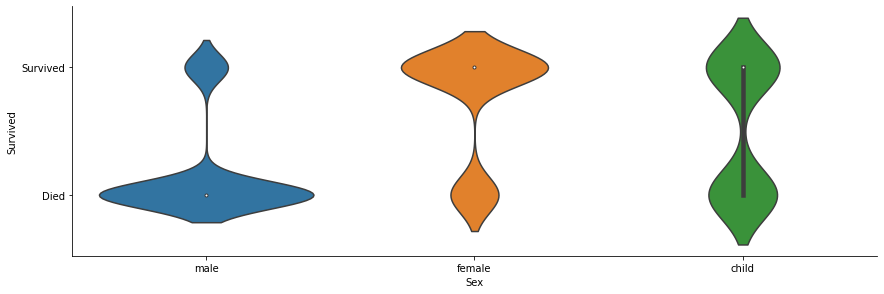

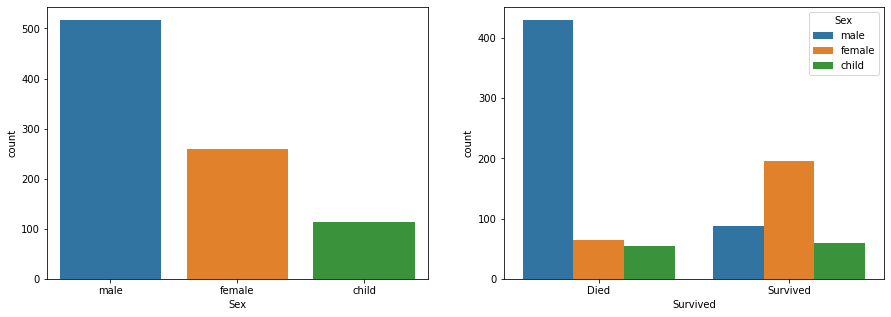

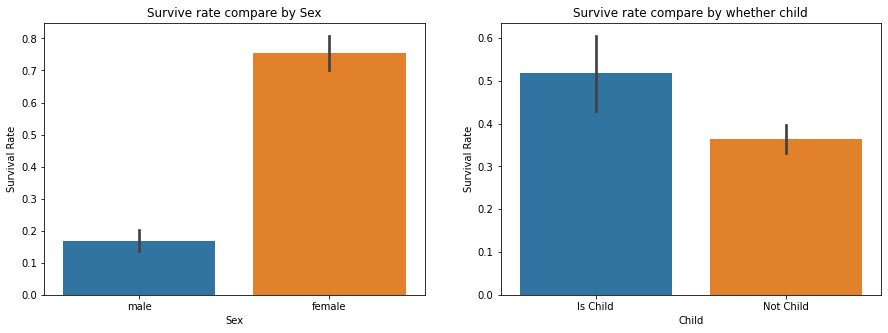

In [9]:
# Draw pictures to see more clearly of the relations
# about sex and age factor

sns.factorplot(data=titanic_df,x='Sex',y='Survived',kind="violin",size=4,aspect=3)
plt.yticks([0,1], ['Died', 'Survived'])

# Plot basic information about sex and age
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=titanic_df, x='Sex',ax=axis1)
sns.countplot(data=titanic_df,x='Survived',hue='Sex',order=[0,1],ax=axis2)
plt.xticks([0,1], ['Died', 'Survived'])

fig, (axis3,axis4) = plt.subplots(1,2,figsize=(15,5))
# Group data by sex and whether child
sex_survi_groups = titanic_df[['Sex','Survived']].groupby(['Sex'],as_index=True)

#Divide into three groups
men_group = sex_survi_groups.get_group('male')
women_group = sex_survi_groups.get_group('female')
children_group = sex_survi_groups.get_group('child')

# Plot survive rate between different sex
sns.barplot(data=titanic_df[['Sex','Survived']],x='Sex',y='Survived',order=['male','female'],ax=axis3)
axis3.set_ylabel("Survival Rate")

# Draw Child and Non-Child plot
sns.barplot(data=titanic_df[['Child', 'Survived']],x='Child',y='Survived',order=['Is Child','Not Child'],ax=axis4)
axis4.set_ylabel("Survival Rate")

axis3.set_title('Survive rate compare by Sex')
axis4.set_title('Survive rate compare by whether child')

In [10]:
# Statistic Hypothesis Test
# Chi-Square Test for Independence
# State the hypothesis: H0: Gender and survival rate are independent
from scipy.stats import chi2_contingency

men_women_group = pd.concat([men_group, women_group])
gender_pivot = pd.pivot_table(data=men_women_group[['Survived','Sex']],index='Survived',columns=['Sex'],
                      aggfunc=len)
chi2, p_value, dof, expected = chi2_contingency(gender_pivot)
print("Results of Chi-Squared test on Sex to Survival.")
print("Chi-Square Score = %s"%str(chi2))
print("Pvalue = %s\n"%str(p_value))

Results of Chi-Squared test on Sex to Survival.
Chi-Square Score = 253.645940447138
Pvalue = 4.164993289430833e-57



In [11]:
# Test for child and non-child
child_pivot = pd.pivot_table(data=titanic_df[['Survived','Child']],index='Survived',columns=['Child'],
                      aggfunc=len)
chi2, p_value, dof, expected = chi2_contingency(child_pivot)
print("Results of Chi-Squared test on Child to Survival.")
print("Chi-Square Score = %s"%str(chi2))
print("Pvalue = %s\n"%str(p_value))

Results of Chi-Squared test on Child to Survival.
Chi-Square Score = 9.243716148713087
Pvalue = 0.002363049112282396



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Survival Rate')

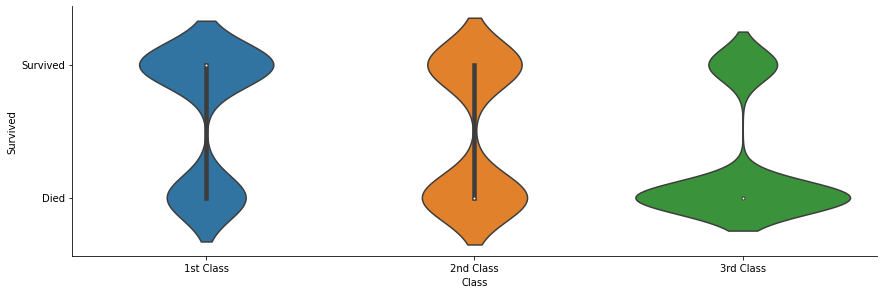

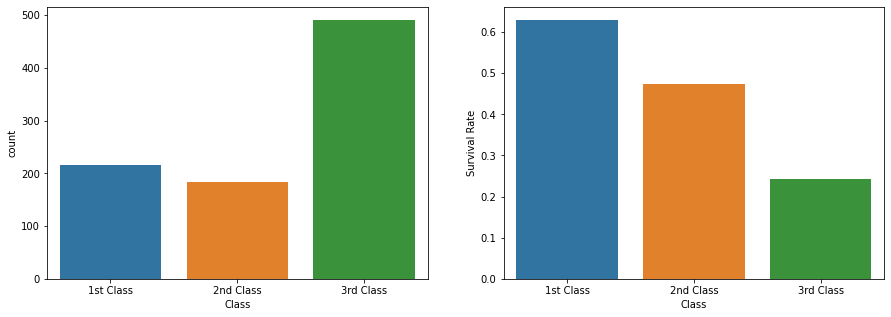

In [12]:
# Then let's analyze class factor
sns.factorplot(data=titanic_df,x='Class',y='Survived',kind="violin", \
               order=['1st Class','2nd Class','3rd Class'],size=4,aspect=3)
plt.yticks([0,1],['Died','Survived'])

# Group by class and take mean
class_survi_prec = titanic_df[['Class','Survived']].groupby(['Class'],as_index=False).mean()

# Compare number and survived rate between three classes
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=titanic_df, x='Class',order=['1st Class','2nd Class','3rd Class'],ax=axis1)
sns.barplot(data=class_survi_prec,x='Class',y='Survived', \
            order=['1st Class','2nd Class','3rd Class'],ax=axis2)
axis2.set_ylabel('Survival Rate')

In [13]:
# Statistic Hypothesis Test:
# H0: Class and Survival rate are independent
class_pivot = pd.pivot_table(data=titanic_df[['Survived','Class']],index='Survived',columns=['Class'],
                            aggfunc=len)
chi2, p_value, dof, expected = chi2_contingency(class_pivot)
print("Results of Chi-Squared test on Class to Survival.")
print("Chi-Square Score = %s"%str(chi2))
print("Pvalue = %s\n"%str(p_value))

Results of Chi-Squared test on Class to Survival.
Chi-Square Score = 102.88898875696056
Pvalue = 4.549251711298793e-23



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


([<matplotlib.axis.XTick at 0x7fdd22019940>,
 [Text(0, 0, 'Died'), Text(1, 0, 'Survived')])

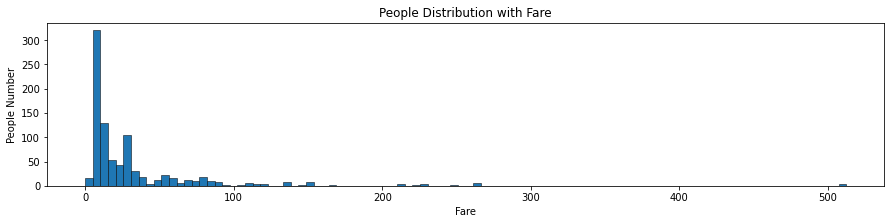

<Figure size 432x288 with 0 Axes>

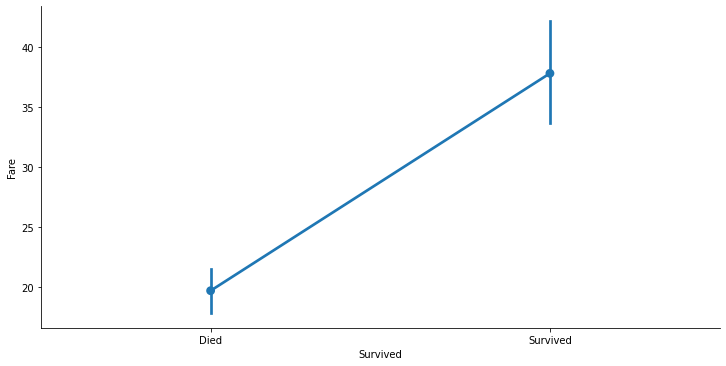

In [14]:
# Last let's analyze fare factor

# Try to plot on a logarithmic x-axis as comment suggests, but it not looks so good 
# fig = titanic_df['Fare'].plot(kind='hist', figsize=(15,3), bins=100, logx=True, 
#                               ls='solid', lw=1, ec='black')

fig = titanic_df['Fare'].plot(kind='hist', figsize=(15,3), bins=100, \
                             ls='solid', lw=0.5, ec='black')
ax = fig.axes
ax.set_xlabel('Fare')
ax.set_ylabel('People Number')
ax.set_title('People Distribution with Fare')

# We clear out people have very high fare
normal_people = titanic_df[['Fare','Survived']][titanic_df['Fare']<200]
fare_survi_group = normal_people[['Fare','Survived']].groupby(['Survived'],as_index=False)

# Survive condition for people with normal fare
figure(2)
sns.factorplot(data=normal_people,x='Survived',y='Fare',aspect=2)
plt.xticks([0,1],['Died','Survived'])

In [15]:
# Statitic Test, variable is continuous, so we choose T-test
# H0: People survived and not survived have same fare, mean(survive_fare)=mean(non_survive_fare)
from scipy.stats import ttest_ind

ttest_ind(fare_survi_group.get_group(0)['Fare'],fare_survi_group.get_group(1)['Fare'])

Ttest_indResult(statistic=-9.225569975498503, pvalue=2.0917174696709927e-19)

,Fare,Pclass
Fare,1.000000,-0.688032
Pclass,-0.688032,1.000000


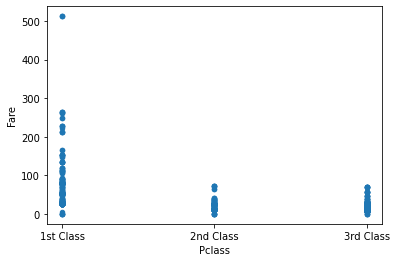

In [16]:
# Obviously We can guess fare is related to passenger class
# from scatter Plot we can see only first class have very high fare
titanic_df.plot.scatter(x='Pclass',y='Fare')
plt.xticks([1,2,3],['1st Class','2nd Class','3rd Class'])

# We calculate their correlation to confirm
titanic_df[['Fare', 'Pclass']].corr(method='spearman')

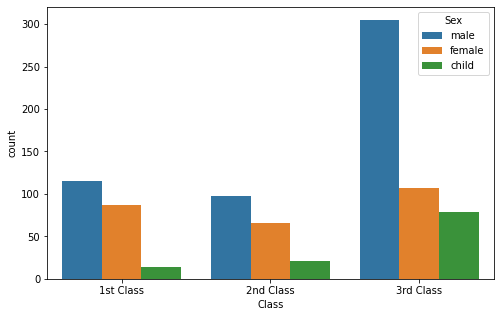

In [17]:
# To explore more details
# let's see sex distrubution in different classes
figure(figsize=(8,5))
sns.countplot(data=titanic_df,x='Class',hue='Sex',order=['1st Class','2nd Class','3rd Class'])

Text(0, 0.5, 'Survival Rate')

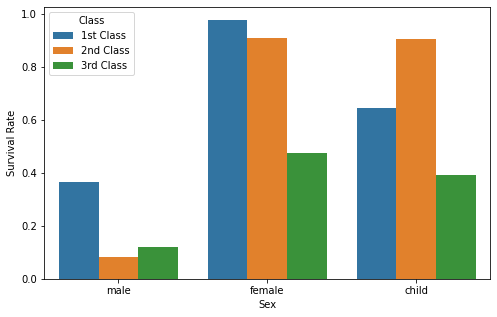

In [18]:
# From above we could see class 3 have large percent of men
# So we can guess the low survived rate of men is caused by class3 men
# the survive rate in higher class between sex may not very distinct

# Draw chart of different classes's survive rate detail
class_sex_group = titanic_df[['Sex','Class','Survived']].groupby(['Sex','Class'],as_index=False)
class_sex_survive_prec = class_sex_group.mean()

figure(figsize=(8,5))
fig = sns.barplot(data=class_sex_survive_prec, x='Sex',y='Survived',hue='Class', \
                  order=['male','female','child'])
fig.axes.set_ylabel('Survival Rate')

In [19]:
# Between class1 and class2 women they have similar survive rates
# Chi-Square test
# H0 = For Class1 and Class2 female, the survive rate and class is independent
female_class1_class2 = titanic_df[(titanic_df['Sex']=='female') \
                                  & ((titanic_df['Class']=='1st Class') \
                                     | (titanic_df['Class']=='2nd Class') )]

class_pivot = pd.pivot_table(data=female_class1_class2[['Survived','Class']],index='Survived',columns=['Class'],
                            aggfunc=len)
chi2, p_value, dof, expected = chi2_contingency(class_pivot)
print("Results of Chi-Squared test on Class to Survival on upper two classes female.")
print("Chi-Square Score = %s"%str(chi2))
print("Pvalue = %s\n"%str(p_value))

Results of Chi-Squared test on Class to Survival on upper two classes female.
Chi-Square Score = 2.2575914090368605
Pvalue = 0.1329607148394736



In [20]:
# Also between class1 and class2 child they have much similar survive rates
# Do test
child_class1_class2 = titanic_df[(titanic_df['Sex']=='child') \
                                  & ((titanic_df['Class']=='1st Class') \
                                     | (titanic_df['Class']=='2nd Class') )]

class_pivot = pd.pivot_table(data=child_class1_class2[['Survived','Class']],index='Survived',columns=['Class'],
                            aggfunc=len)
chi2, p_value, dof, expected = chi2_contingency(class_pivot)
print("Results of Chi-Squared test on Class to Survival on upper two classes child.")
print("Chi-Square Score = %s"%str(chi2))
print("Pvalue = %s\n"%str(p_value))

Results of Chi-Squared test on Class to Survival on upper two classes child.
Chi-Square Score = 2.1502976190476195
Pvalue = 0.1425422559692581



In [21]:
# And class2 and class3 male they also have similar survive rate
male_class2_class3 = titanic_df[(titanic_df['Sex']=='male') \
                                  & ((titanic_df['Class']=='3rd Class') \
                                     | (titanic_df['Class']=='2nd Class') )]

class_pivot = pd.pivot_table(data=male_class2_class3[['Survived','Class']],index='Survived',columns=['Class'],
                            aggfunc=len)
print("Results of Chi-Squared test on Class to Survival on lower two classes male.")
print("Chi-Square Score = %s"%str(chi2))
print("Pvalue = %s\n"%str(p_value))

Results of Chi-Squared test on Class to Survival on lower two classes male.
Chi-Square Score = 2.1502976190476195
Pvalue = 0.1425422559692581

